## Simultaneous multislice SENSE 
###### Author: Zimu Huo
###### Date: 05.2022

testing SMS SENSE as a normal 2D problem. Nothing too exciting here ...

In [1]:
import sys
sys.path.insert(1, '../')
import matplotlib.pyplot as plt
import numpy as np
from scipy import io
import util.simulator as simulate
from util.coil import *
from util.fft import *
import util.mask as undersample
from util.SENSE import *

In [2]:
numSlice = 4
R = 4

In [3]:
from util.twix import *
file_sms = "../lib/resource/data/multicoil_4slice/meas_MID00134_FID55501_catesain_4slices.dat"
file = readtwix(file_sms)
data = file[0]['readouts'][...,:numSlice]
rawImage = ifft2c(data)
fovHeight, fovWidth, numCoil, _ = rawImage.shape

Software version: VD/VE (!?)

Scan  0
100 % parsed in 0 s. Estimated 0 s remaining.
Scan  1
100 % parsed in 1 s. Estimated 0 s remaining.
----------------------------------------------------------------------------------------------------
reading raw data, calculating trajectories and sampling raster 


  0%|          | 0/1063 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
file parsed, the scans detected in sequential order are: 
DATA
DATA
DATA
DATA
----------------------------------------------------------------------------------------------------
loading and preprocessing the data..
[' sli: 0 par: 0 rep: 0 phs: 0 dtype: DATA']
[' sli: 1 par: 0 rep: 0 phs: 0 dtype: DATA']
[' sli: 2 par: 0 rep: 0 phs: 0 dtype: DATA']
[' sli: 3 par: 0 rep: 0 phs: 0 dtype: DATA']
 sli: 0 par: 0 rep: 0 phs: 0 dtype: DATA
 sli: 1 par: 0 rep: 0 phs: 0 dtype: DATA
 sli: 2 par: 0 rep: 0 phs: 0 dtype: DATA
 sli: 3 par: 0 rep: 0 phs: 0 dtype: DATA
----------------------------------------------------------------------------------------------------
dynamically combining data according to dtype, sli, par, rep..
concat  DATA DATA 3
concat  DATA DATA 3
concat  DATA DATA 3
----------------------------------------------------------------------------------------------------
finished, the 

In [4]:
sensMap = np.zeros([fovHeight, fovWidth, numCoil, numSlice], dtype = complex)
for sli in range (numSlice):
    for c in range (numCoil):
        sensMap[:,:,c,sli] = rawImage[:,:,c,sli] / (rsos(rawImage[:,:,:,sli])+1E-3) 

In [5]:
cycle = np.arange(0,1,1/numSlice) * 2* np.pi
numAccq = int(numSlice*fovHeight/R)

In [6]:
shift = cycle*numAccq/(2*np.pi)
imgLarge = simulate.multiSliceFov(rawImage, shift)
sensLarge = simulate.multiSliceFov(sensMap, shift)

In [7]:
mask = undersample.sense(imgLarge.shape,R)

In [8]:
dataLarge = fft2c(imgLarge)
data = dataLarge[::R, : , :]
dataLarge = dataLarge * mask 
imageLargeR = ifft2c(dataLarge)
imageR = ifft2c(data)

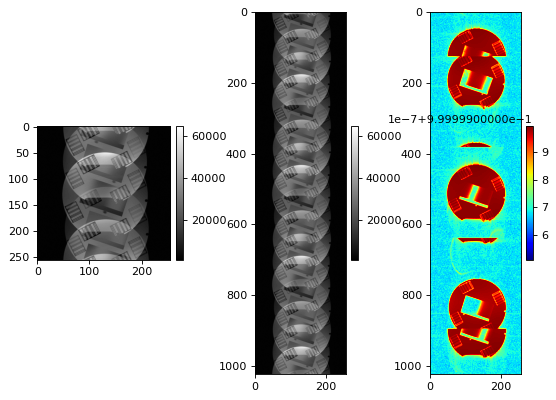

In [9]:
plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(131)
tf = plt.imshow(np.abs(rsos(imageR)), cmap ="gray")
plt.colorbar(tf, fraction=0.046, pad=0.04)
plt.subplot(132)
tf = plt.imshow(np.abs(rsos(imageLargeR)), cmap ="gray")
plt.colorbar(tf, fraction=0.046, pad=0.04)
plt.subplot(133)
tf = plt.imshow(np.abs(rsos(sensLarge)) ,cmap ="jet")
plt.colorbar(tf, fraction=0.046, pad=0.04)
plt.show()

In [10]:
recon = sense(imageLargeR, sensLarge, 4)

  0%|          | 0/256 [00:00<?, ?it/s]

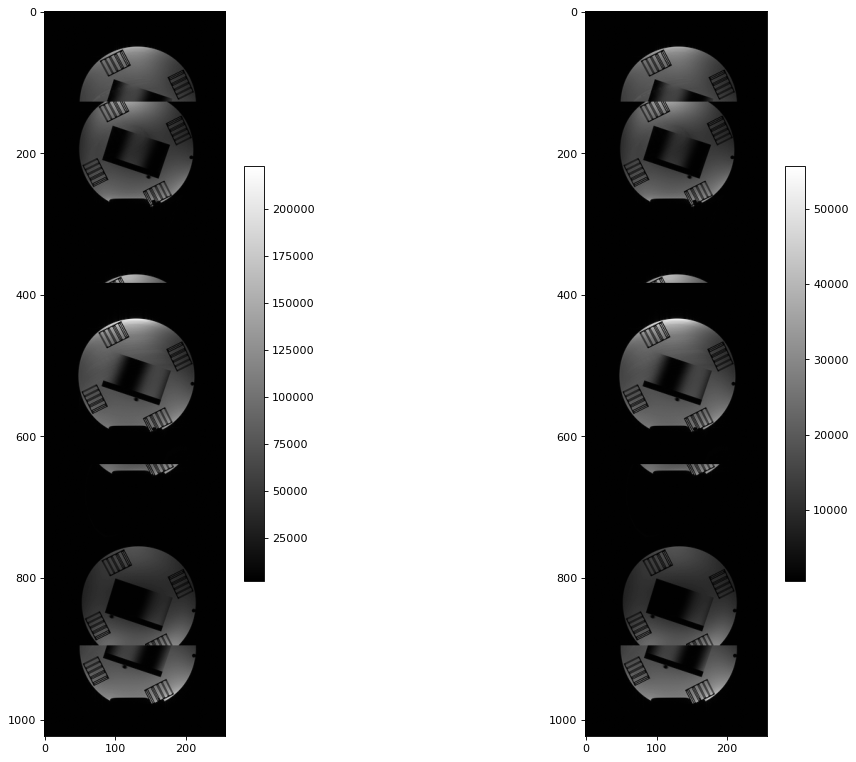

In [11]:
plt.figure(figsize=(16, 12), dpi=80)
plt.subplot(121)
tf = plt.imshow(np.abs(rsos(imgLarge)), cmap ="gray")
plt.colorbar(tf, fraction=0.046, pad=0.04)
plt.subplot(122)
tf = plt.imshow(np.abs(recon), cmap ="gray")
plt.colorbar(tf, fraction=0.046, pad=0.04)
plt.show()